<h2>Activation functions: </h2>

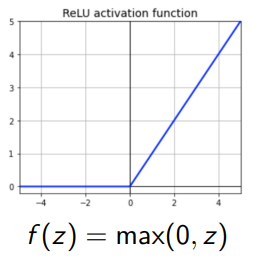
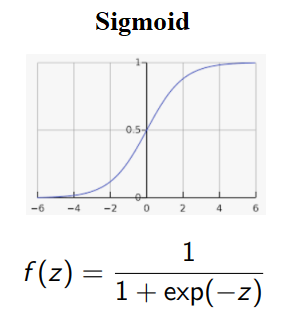

<h2 style="color: green"><b>Training data:</b></h2>

<h3>Cars:</h3>

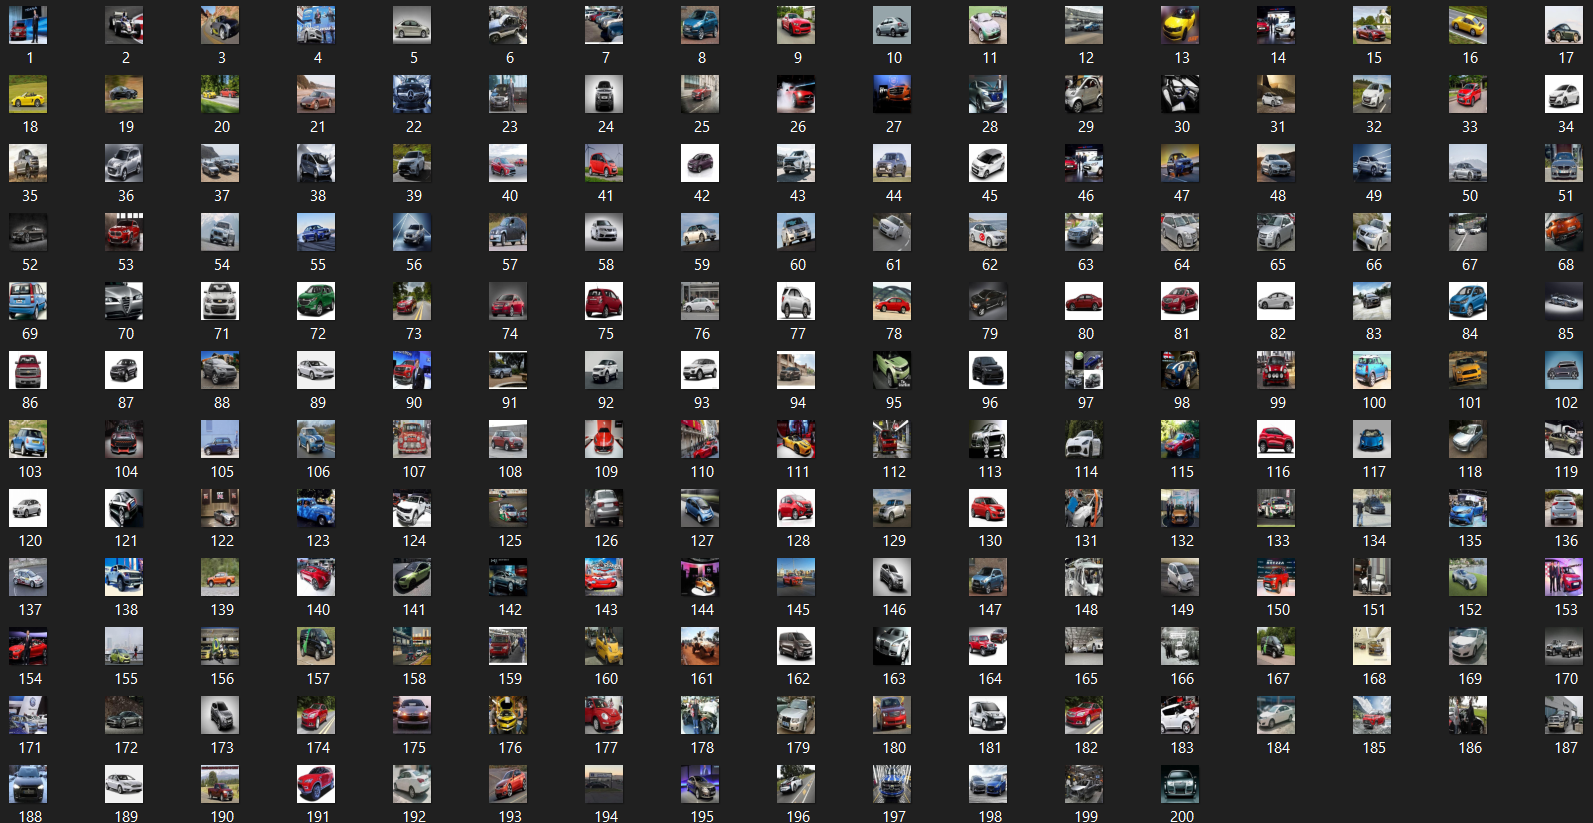

<h3>Planes:</h3>

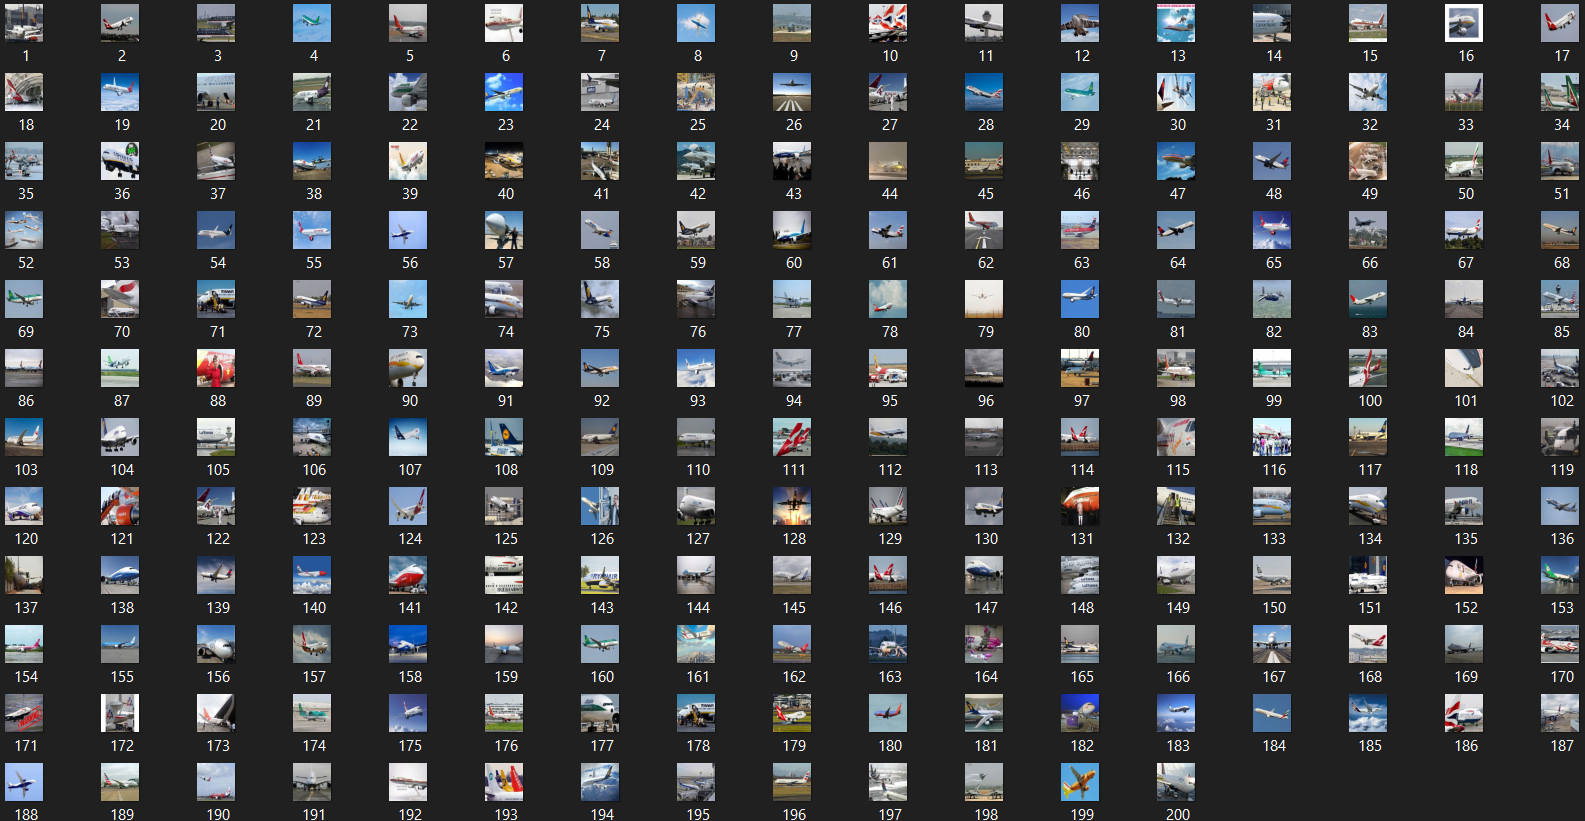

<h2 style="color: cyan"><b>Testing data:</b></h2>

<h3>Cars:</h3>

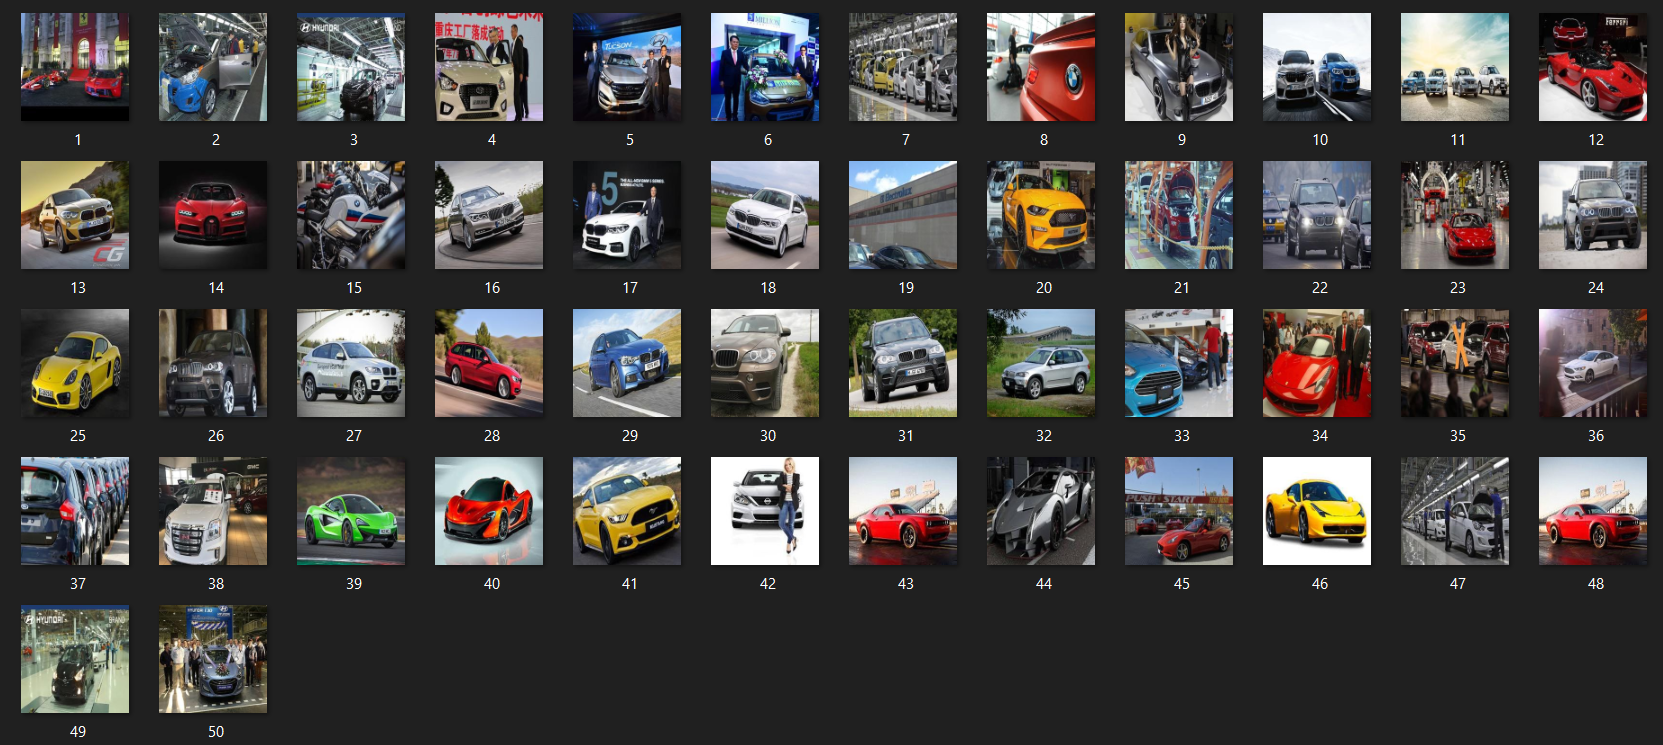

<h3>Planes:</h3>

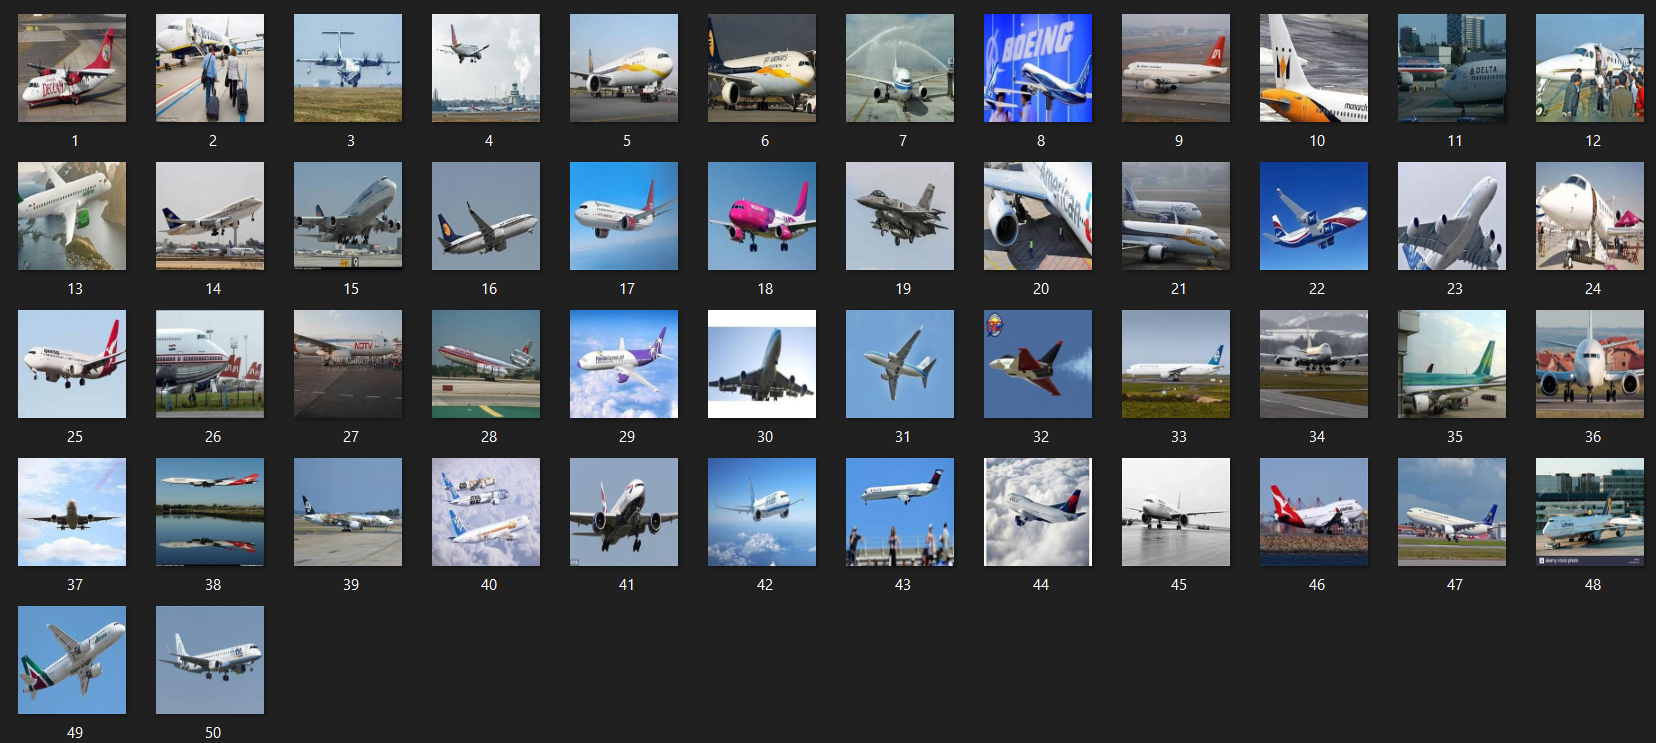

In [21]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K

In [22]:
image_width = 224
image_height = 224

train_data_directory = "v_data/train"
validation_data_directory = "v_data/test/"

number_of_training_samples = 400    # cars (200) + planes (200) = 400
number_of_validation_samples = 100  # cars ( 50) + planes ( 50) = 100

epochs = 10
batch_size = 16

if K.image_data_format() == 'channels_first':
    input_shape = (3, image_width, image_height)
else:
    input_shape = (image_width, image_height, 3)
    
sequential_model = Sequential()
sequential_model.add(Conv2D(32, (2, 2), input_shape=input_shape))
sequential_model.add(Activation('relu'))
sequential_model.add(MaxPooling2D(pool_size=(2, 2)))

sequential_model.add(Conv2D(32, (2, 2)))
sequential_model.add(Activation('relu'))
sequential_model.add(MaxPooling2D(pool_size=(2, 2)))

sequential_model.add(Conv2D(64, (2, 2)))
sequential_model.add(Activation('relu'))
sequential_model.add(MaxPooling2D(pool_size=(2, 2)))

sequential_model.add(Flatten())
sequential_model.add(Dense(64))
sequential_model.add(Activation('relu'))
sequential_model.add(Dropout(0.5))
sequential_model.add(Dense(1))
sequential_model.add(Activation('sigmoid'))

sequential_model.compile(loss="binary_crossentropy",
                         optimizer="rmsprop",
                         metrics=['accuracy'])

<h2>Loading images and learning CNN model</h2>  

In [42]:
training_datagen = ImageDataGenerator(
    rescale= 1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

testing_datagen = ImageDataGenerator(rescale= 1. / 255)

training_generator = training_datagen.flow_from_directory(
    train_data_directory,
    target_size=(image_width, image_height),
    batch_size=batch_size,
    class_mode="binary"
)

validation_generator = testing_datagen.flow_from_directory(
    validation_data_directory,
    target_size=(image_width, image_height),
    batch_size=batch_size,
    class_mode="binary"
)

sequential_model.fit_generator(
    training_generator,
    steps_per_epoch=number_of_training_samples // batch_size, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=number_of_validation_samples // batch_size
)

sequential_model.save_weights("sequential_model_weigths.h5")
sequential_model.save("sequential_model.keras")

Found 400 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


C:\Users\PanCh\AppData\Local\Temp\ipykernel_22372\2530184573.py:24: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  sequential_model.fit_generator(


Epoch 1/10
25/25 [==============================] - 8s 297ms/step - loss: 0.1050 - accuracy: 0.9500 - val_loss: 0.2843 - val_accuracy: 0.9167
Epoch 2/10
25/25 [==============================] - 8s 298ms/step - loss: 0.1466 - accuracy: 0.9475 - val_loss: 0.3560 - val_accuracy: 0.9062
Epoch 3/10
25/25 [==============================] - 7s 293ms/step - loss: 0.1238 - accuracy: 0.9525 - val_loss: 0.2789 - val_accuracy: 0.8854
Epoch 4/10
25/25 [==============================] - 7s 294ms/step - loss: 0.0949 - accuracy: 0.9650 - val_loss: 0.4164 - val_accuracy: 0.8958
Epoch 5/10
25/25 [==============================] - 7s 291ms/step - loss: 0.1403 - accuracy: 0.9550 - val_loss: 0.3067 - val_accuracy: 0.9062
Epoch 6/10
25/25 [==============================] - 7s 291ms/step - loss: 0.1200 - accuracy: 0.9575 - val_loss: 0.3417 - val_accuracy: 0.9167
Epoch 7/10
25/25 [==============================] - 7s 293ms/step - loss: 0.1613 - accuracy: 0.9325 - val_loss: 0.2149 - val_accuracy: 0.9271
Epoch 

<h2>Loading images and making predictions by using Sequential CNN (Convolutional Neural Network)</h2>

<h3>Tested Plane:</h3>

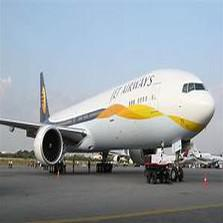

Path: v_data/test/planes/5.jpg

In [49]:
from keras.models import load_model
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16
import numpy as np

sequential_model = load_model('sequential_model.keras')

image = load_img('v_data/test/planes/5.jpg', target_size=(224, 224))

img = np.array(image)
img = img / 255.0
img = img.reshape(1, 224, 224, 3)
output_label = sequential_model.predict(img)

print(f"Predicted class (0 - cars, 1- planes): {output_label[0][0]}")

1/1 [==============================] - 0s 81ms/step
Predicted class (0 - cars, 1- planes): 0.9932411313056946
